# 스팸 메일 분류하기

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv',encoding='latin1')

In [ ]:
print('총 샘플의 수 : ',len(data))

총 샘플의 수 :  5572


In [ ]:
data[:5]

v1  ... Unnamed: 4
0   ham  ...        NaN
1   ham  ...        NaN
2  spam  ...        NaN
3   ham  ...        NaN
4   ham  ...        NaN

[5 rows x 5 columns]

* spam : 스팸 메일 -> 1
* ham : 정상 메일 -> 0
* Unnamed : 불필요한 데이터

In [ ]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

data['v1']=data['v1'].replace(['ham','spam'],[0,1])
data[:5]

v1                                                 v2
0   0  Go until jurong point, crazy.. Available only ...
1   0                      Ok lar... Joking wif u oni...
2   1  Free entry in 2 a wkly comp to win FA Cup fina...
3   0  U dun say so early hor... U c already then say...
4   0  Nah I don't think he goes to usf, he lives aro...

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
# Null 값을 가진 샘플이 있는지 확인
data.isnull().values.any()

False

In [ ]:
# 데이터에 중복이 있지는 않은지 확인
data['v2'].nunique(), data['v1'].nunique()

(5169, 2)

* 5,572 개의 샘플에서 중복제거한 샘플 개수가 5,169개라는 것은 403개의 중복 샘플이 존재한다는 의미이다.

In [ ]:
data.drop_duplicates(subset=['v2'],inplace=True) # v2 열에서 중복인 내용이 있다면 중복 제거.

In [ ]:
print('총 샘플의 수 : ',len(data))

총 샘플의 수 :  5169


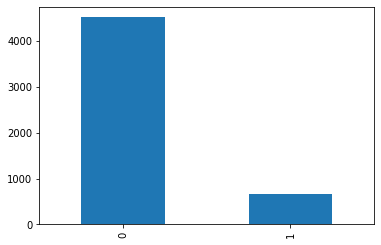

In [ ]:
data['v1'].value_counts().plot(kind='bar')

In [ ]:
print(data.groupby('v1').size().reset_index(name='count'))

   v1  count
0   0   4516
1   1    653


In [ ]:
X_data=data['v2'] # 메일 본문
y_data=data['v1'] # 메일 레이블 (1,0)
print('메일 본문의 개수 : {}'.format(len(X_data)))
print('레이블의 개수 : {}'.format(len(y_data)))

메일 본문의 개수 : 5169
레이블의 개수 : 5169


In [ ]:
# 케라스 토크나이저를 통해 토큰화와 정수 인코딩 과정 수행
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_data) # 5169 개의 행을 가진 x의 각 행에 토큰화를 수행
sequences=tokenizer.texts_to_sequences(X_data) # 단어를 숫자값, 인덱스로 변환하여 저장

In [ ]:
print(sequences[:5])

[[47, 433, 4013, 780, 705, 662, 64, 8, 1202, 94, 121, 434, 1203, 142, 2712, 1204, 68, 57, 4014, 137], [49, 306, 1364, 435, 6, 1767], [53, 537, 8, 20, 4, 1016, 934, 2, 220, 2713, 1365, 706, 2714, 2715, 267, 2716, 70, 2713, 2, 2717, 2, 359, 537, 604, 1205, 82, 436, 185, 707, 437, 4015], [6, 226, 152, 23, 347, 2718, 6, 138, 145, 56, 152], [935, 1, 97, 96, 69, 453, 2, 877, 69, 1768, 198, 105, 438]]


In [ ]:
word_to_index=tokenizer.word_index
print(word_to_index) # 각 단어의 빈도수가 높을 수록 낮은 정수(index)가 부여된다.

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'call': 17, 'that': 18, 'on': 19, '2': 20, 'are': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'at': 27, 'or': 28, "i'm": 29, 'do': 30, 'be': 31, 'get': 32, 'will': 33, 'just': 34, 'if': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, 'gt': 42, 'lt': 43, '4': 44, 'how': 45, 'when': 46, 'go': 47, 'from': 48, 'ok': 49, 'out': 50, 'all': 51, 'what': 52, 'free': 53, 'know': 54, 'like': 55, 'then': 56, 'got': 57, 'good': 58, 'come': 59, 'am': 60, 'was': 61, 'time': 62, 'its': 63, 'only': 64, 'day': 65, 'want': 66, 'love': 67, 'there': 68, 'he': 69, 'text': 70, 'send': 71, 'going': 72, 'one': 73, 'need': 74, 'by': 75, 'lor': 76, 'home': 77, 'as': 78, 'about': 79, 'still': 80, 'see': 81, 'txt': 82, 'back': 83, 'r': 84, 'stop': 85, 'da': 86, 'k': 87, 'today': 88, 'our': 89, "i'll": 90, 'dont': 91, 'reply': 

In [ ]:
word_count=tokenizer.word_counts.items()
print(word_count)

odict_items([('go', 271), ('until', 27), ('jurong', 1), ('point', 13), ('crazy', 15), ('available', 16), ('only', 199), ('in', 826), ('bugis', 7), ('n', 131), ('great', 106), ('world', 27), ('la', 7), ('e', 92), ('buffet', 2), ('cine', 7), ('there', 185), ('got', 232), ('amore', 1), ('wat', 95), ('ok', 258), ('lar', 38), ('joking', 6), ('wif', 27), ('u', 1043), ('oni', 4), ('free', 251), ('entry', 21), ('2', 473), ('a', 1293), ('wkly', 9), ('comp', 10), ('to', 2070), ('win', 57), ('fa', 2), ('cup', 6), ('final', 15), ('tkts', 2), ('21st', 2), ('may', 45), ('2005', 2), ('text', 175), ('87121', 2), ('receive', 32), ('question', 18), ('std', 7), ('txt', 148), ('rate', 27), ('t', 65), ("c's", 15), ('apply', 27), ("08452810075over18's", 1), ('dun', 55), ('say', 83), ('so', 439), ('early', 33), ('hor', 2), ('c', 95), ('already', 91), ('then', 233), ('nah', 10), ('i', 2229), ("don't", 129), ('think', 130), ('he', 184), ('goes', 26), ('usf', 11), ('lives', 4), ('around', 61), ('here', 120), ('

In [ ]:
# 빈도수가 1회 밖에 되지않는 단어들이 얼마나 존재하는지 확인.
threshold=2
total_cnt=len(word_to_index)
rare_cnt=0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq=0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq=0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4908
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.02242152466368
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.082538108811501


등장 빈도가 threshold 값인 2회 미만. 즉, 1회 밖에 되지 않는 단어들은 단어 집합에서 무려 절반 이상을 차지합니다. 하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 적은 수치인 6%밖에 되지 않습니다. 만약, 이러한 분석을 통해 등장 빈도가 지나치게 낮은 단어들은 자연어 처리에서 제외하고 싶다면 케라스 토크나이저 선언 시에 단어 집합의 크기를 제한할 수 있었다는 사실을 기억합시다. (정수 인코딩 챕터 참고) 가령, 아래의 코드로 등장 빈도가 1회인 단어들을 제외할 수 있을 겁니다.
* tokenizer = Tokenizer(num_words = total_cnt - rare_cnt + 1) : 빈도수에 따라서 단어들을 토크나이징하기때문에, 등장빈도가 1회인 단어들을 제외할 수 있게 됨.

In [ ]:
vocab_size = len(word_to_index) + 1 # 패딩을 위한 토큰인 0번 단어를 고려
print('단어 집합의 크기: {}'.format((vocab_size)))


단어 집합의 크기: 8921


In [ ]:
# 훈련 데이터셋과 테스트 데이터셋의 분리

n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

훈련 데이터의 개수 : 4135
테스트 데이터의 개수: 1034


메일의 최대 길이 : 189
메일의 평균 길이 : 15.610370


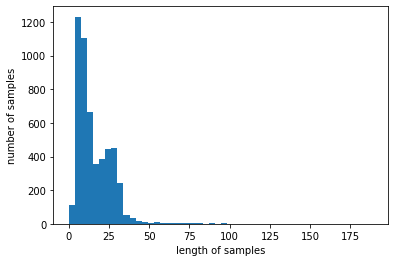

In [ ]:
# 메일 본문의 길이 분포
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len = 189
# 전체 데이터셋의 길이는 max_len으로 맞춥니다.
data = pad_sequences(X_data, maxlen = max_len) # 5169개의 X_data의 길이를 전부 189 로 바꾼다. 189보다 길이가 짧은 메일 샘플은 전부 숫자 0이 패딩되어 189의 길이를 가지게 된다.
print("훈련 데이터의 크기(shape): ", data.shape)

훈련 데이터의 크기(shape):  (5169, 189)


In [ ]:
data

array([[   0,    0,    0, ...,   57, 4014,  137],
       [   0,    0,    0, ...,  435,    6, 1767],
       [   0,    0,    0, ...,  707,  437, 4015],
       ...,
       [   0,    0,    0, ...,   99,  240, 8919],
       [   0,    0,    0, ...,  196,   12,   53],
       [   0,    0,    0, ...,    2,   63,  283]], dtype=int32)

In [ ]:
# 훈련 데이터와 테스트 데이터 분리

X_test = data[n_of_train:] #X_data 데이터 중에서 뒤의 1034개의 데이터만 저장
y_test = np.array(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1034개의 데이터만 저장
X_train = data[:n_of_train] #X_data 데이터 중에서 앞의 4135개의 데이터만 저장
y_train = np.array(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4135개의 데이터만 저장

# RNN으로 스팸 메일 분류하기

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 [==============================] - 3s 34ms/step - loss: 0.3251 - acc: 0.8960 - val_loss: 0.1692 - val_acc: 0.9601
Epoch 2/4
52/52 [==============================] - 2s 30ms/step - loss: 0.1142 - acc: 0.9740 - val_loss: 0.1244 - val_acc: 0.9770
Epoch 3/4
52/52 [==============================] - 2s 30ms/step - loss: 0.0636 - acc: 0.9831 - val_loss: 0.0539 - val_acc: 0.9831
Epoch 4/4
52/52 [==============================] - 2s 31ms/step - loss: 0.1293 - acc: 0.9501 - val_loss: 0.1377 - val_acc: 0.9565


In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

33/33 [==============================] - 0s 7ms/step - loss: 0.1405 - acc: 0.9565

 테스트 정확도: 0.9565


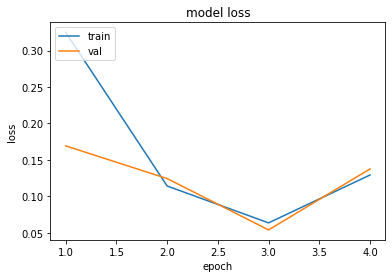

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


* 이번 실습 데이터는 데이터의 양이 적어 과적합이 빠르게 시작되므로, 검증 데이터에 대한 오차가 증가하기 시작하는 시점의 바로 직전인 에포크 3~4 정도가 적당합니다. 이 데이터는 에포크 5를 넘어가기 시작하면 검증 데이터의 오차가 증가하는 경향이 있습니다.